In [1]:
import pandas as pd

from _utils import plot_cdf_pdf, compare_models, compare_cdfs_ks, compare_cdfs_emd, compare_cdfs_moments

In [2]:
# # load data from csv files
# algo_name = "SAC"
# optim_name = "SGD"
# reward_method = "channel_capacity"
# results_dir = 'results'
# results_folder = f'{algo_name}-{optim_name}-{reward_method}'

In [3]:
# ch_cap_data = {
#     'model_se':     {'label': 'DRL Model [Channel Capacity]',   'data': pd.read_csv(f'{results_dir}/{results_folder}/ch_cap_results_model_se.csv',      index_col=0)},
#     'maxmin_se':    {'label': 'Max-Min',                        'data': pd.read_csv(f'{results_dir}/{results_folder}/ch_cap_results_maxmin_se.csv',     index_col=0)},
#     'maxprod_se':   {'label': 'Max-Product',                    'data': pd.read_csv(f'{results_dir}/{results_folder}/ch_cap_results_maxprod_se.csv',    index_col=0)},
#     'sumrate_se':   {'label': 'Max-Sum-Rate',                   'data': pd.read_csv(f'{results_dir}/{results_folder}/ch_cap_results_sumrate_se.csv',    index_col=0)},
# }

In [4]:
# plot_cdf_pdf(title='Spectral Efficiencies', data=ch_cap_data, operation=None, cumulative=True, fill=True)

In [5]:
# # load data from csv files
# algo_name = "SAC"
# optim_name = "SGD"
# reward_method = "geo_mean_se"
# results_dir = 'results'
# results_folder = f'{algo_name}-{optim_name}-{reward_method}'

In [6]:
# geo_mean_data = {
#     'model_se':     {'label': 'DRL Model [Geo-Mean-SE]',    'data': pd.read_csv(f'{results_dir}/{results_folder}/geo_mean_results_model_se.csv',    index_col=0)},
#     'maxmin_se':    {'label': 'Max-Min',                    'data': pd.read_csv(f'{results_dir}/{results_folder}/geo_mean_results_maxmin_se.csv',   index_col=0)},
#     'maxprod_se':   {'label': 'Max-Product',                'data': pd.read_csv(f'{results_dir}/{results_folder}/geo_mean_results_maxprod_se.csv',  index_col=0)},
#     'sumrate_se':   {'label': 'Max-Sum-Rate',               'data': pd.read_csv(f'{results_dir}/{results_folder}/geo_mean_results_sumrate_se.csv',  index_col=0)},
# }

In [7]:
# plot_cdf_pdf(title='Spectral Efficiencies', data=geo_mean_data, operation=None, cumulative=True, fill=True)

In [8]:
# # load data from csv files
# algo_name = "SAC"
# optim_name = "SGD"
# reward_method = "mean_se"
# results_dir = 'results'
# results_folder = f'{algo_name}-{optim_name}-{reward_method}'

In [9]:
# mean_data = {
#     'model_se':     {'label': 'DRL Model [Mean-SE]',    'data': pd.read_csv(f'{results_dir}/{results_folder}/mean_results_model_se.csv',    index_col=0)},
#     'maxmin_se':    {'label': 'Max-Min',                'data': pd.read_csv(f'{results_dir}/{results_folder}/mean_results_maxmin_se.csv',   index_col=0)},
#     'maxprod_se':   {'label': 'Max-Product',            'data': pd.read_csv(f'{results_dir}/{results_folder}/mean_results_maxprod_se.csv',  index_col=0)},
#     'sumrate_se':   {'label': 'Max-Sum-Rate',           'data': pd.read_csv(f'{results_dir}/{results_folder}/mean_results_sumrate_se.csv',  index_col=0)},
# }

In [10]:
# plot_cdf_pdf(title='Spectral Efficiencies', data=mean_data, operation=None, cumulative=True, fill=True)

In [11]:
# algo_name = "SAC"
# optim_name = "SGD"
# reward_method = "min_se"
# results_dir = 'results'
# results_folder = f'{algo_name}-{optim_name}-{reward_method}'

In [12]:
# min_data = {
#     'model_se':     {'label': 'DRL Model [Min-SE]',     'data': pd.read_csv(f'{results_dir}/{results_folder}/min_results_model_se.csv',     index_col=0)},
#     'maxmin_se':    {'label': 'Max-Min',                'data': pd.read_csv(f'{results_dir}/{results_folder}/min_results_maxmin_se.csv',    index_col=0)},
#     'maxprod_se':   {'label': 'Max-Product',            'data': pd.read_csv(f'{results_dir}/{results_folder}/min_results_maxprod_se.csv',   index_col=0)},
#     'sumrate_se':   {'label': 'Max-Sum-Rate',           'data': pd.read_csv(f'{results_dir}/{results_folder}/min_results_sumrate_se.csv',   index_col=0)},
# }

In [13]:
# plot_cdf_pdf(title='Spectral Efficiencies', data=min_data, operation=None, cumulative=True, fill=True)

In [14]:
# algo_name = "SAC"
# optim_name = "SGD"
# reward_method = "sum_se"
# results_dir = 'results'
# results_folder = f'{algo_name}-{optim_name}-{reward_method}'

In [15]:
# sum_data = {
#     'model_se':     {'label': 'DRL Model [Sum-SE]',     'data': pd.read_csv(f'{results_dir}/{results_folder}/sum_results_model_se.csv',     index_col=0)},
#     'maxmin_se':    {'label': 'Max-Min',                'data': pd.read_csv(f'{results_dir}/{results_folder}/sum_results_maxmin_se.csv',    index_col=0)},
#     'maxprod_se':   {'label': 'Max-Product',            'data': pd.read_csv(f'{results_dir}/{results_folder}/sum_results_maxprod_se.csv',   index_col=0)},
#     'sumrate_se':   {'label': 'Max-Sum-Rate',           'data': pd.read_csv(f'{results_dir}/{results_folder}/sum_results_sumrate_se.csv',   index_col=0)},
# }

In [16]:
# plot_cdf_pdf(title='Spectral Efficiencies', data=sum_data, operation=None, cumulative=True, fill=True)

In [17]:
# data = {
#     'model_ch_se':      {'label': 'DRL Model [Channel Capacity]',   'data': pd.read_csv(f'{results_dir}/SAC-SGD-channel_capacity/ch_cap_results_model_se.csv',  index_col=0)},
#     'model_geo_se':     {'label': 'DRL Model [Geo-Mean-SE]',        'data': pd.read_csv(f'{results_dir}/SAC-SGD-geo_mean_se/geo_mean_results_model_se.csv',     index_col=0)},
#     'model_mean_se':    {'label': 'DRL Model [Mean-SE]',            'data': pd.read_csv(f'{results_dir}/SAC-SGD-mean_se/mean_results_model_se.csv',             index_col=0)},
#     'model_min_se':     {'label': 'DRL Model [Min-SE]',             'data': pd.read_csv(f'{results_dir}/SAC-SGD-min_se/min_results_model_se.csv',               index_col=0)},
#     'model_sum_se':     {'label': 'DRL Model [Sum-SE]',             'data': pd.read_csv(f'{results_dir}/SAC-SGD-sum_se/sum_results_model_se.csv',               index_col=0)},
# }

In [18]:
# plot_cdf_pdf(title='Spectral Efficiencies', data=data, operation=None, cumulative=True, fill=True)

In [19]:
# max_min_data = {
#     'ch_cap':   {'label': 'Max-Min [Channel Capacity]', 'data': pd.read_csv(f'{results_dir}/SAC-SGD-channel_capacity/ch_cap_results_maxmin_se.csv',     index_col=0)},
#     'geo_mean': {'label': 'Max-Min [geo mean]',         'data': pd.read_csv(f'{results_dir}/SAC-SGD-geo_mean_se/geo_mean_results_maxmin_se.csv',        index_col=0)},
#     'mean':     {'label': 'Max-Min [mean]',             'data': pd.read_csv(f'{results_dir}/SAC-SGD-mean_se/mean_results_maxmin_se.csv',                index_col=0)},
#     'min':      {'label': 'Max-Min [min]',              'data': pd.read_csv(f'{results_dir}/SAC-SGD-min_se/min_results_maxmin_se.csv',                  index_col=0)},
#     'sum':      {'label': 'Max-Min [sum]',              'data': pd.read_csv(f'{results_dir}/SAC-SGD-sum_se/sum_results_maxmin_se.csv',                  index_col=0)},
# }

In [20]:
# plot_cdf_pdf(title='Spectral Efficiencies', data=max_min_data, operation=None, cumulative=True, fill=True)

In [45]:
# load data from csv files
algo_name = "SAC"
optim_name = "SGD"
results_dir = 'results'
results_folder = f'{algo_name}-{optim_name}'

data = {
    'Model_ch_cap_SEs':     {'label': 'DRL Model [Channel Capacity]',   'data': pd.read_csv(f'{results_dir}/{results_folder}/Model_ch_cap_SEs.csv',     index_col=0), 'color': 'green', 'linestyle': '-', 'linewidth': 2},
    'Model_geo_mean_SEs':   {'label': 'DRL Model [Geo Mean]',           'data': pd.read_csv(f'{results_dir}/{results_folder}/Model_geo_mean_SEs.csv',   index_col=0), 'color': 'black', 'linestyle': '--', 'linewidth': 2},
    'Model_mean_SEs':       {'label': 'DRL Model [Mean]',               'data': pd.read_csv(f'{results_dir}/{results_folder}/Model_mean_SEs.csv',       index_col=0), 'color': 'yellow', 'linestyle': '-.', 'linewidth': 2},
    'Model_min_SEs':        {'label': 'DRL Model [Min]',                'data': pd.read_csv(f'{results_dir}/{results_folder}/Model_min_SEs.csv',        index_col=0), 'color': 'red', 'linestyle': ':', 'linewidth': 2},
    'Model_sum_SEs':        {'label': 'DRL Model [Sum]',                'data': pd.read_csv(f'{results_dir}/{results_folder}/Model_sum_SEs.csv',        index_col=0), 'color': 'magenta', 'linestyle': '-', 'linewidth': 2},
    'maxmin_se':            {'label': 'Max-Min',                        'data': pd.read_csv(f'{results_dir}/{results_folder}/maxmin_SEs.csv',           index_col=0), 'color': 'green', 'linestyle': '-', 'linewidth': 0.5},
    'maxprod_se':           {'label': 'Max-Product',                    'data': pd.read_csv(f'{results_dir}/{results_folder}/maxprod_SEs.csv',          index_col=0), 'color': 'yellow', 'linestyle': '-', 'linewidth': 0.5},
    'sumrate_se':           {'label': 'Max-Sum-Rate',                   'data': pd.read_csv(f'{results_dir}/{results_folder}/sumrate_SEs.csv',          index_col=0), 'color': 'black', 'linestyle': '-', 'linewidth': 0.5},
}

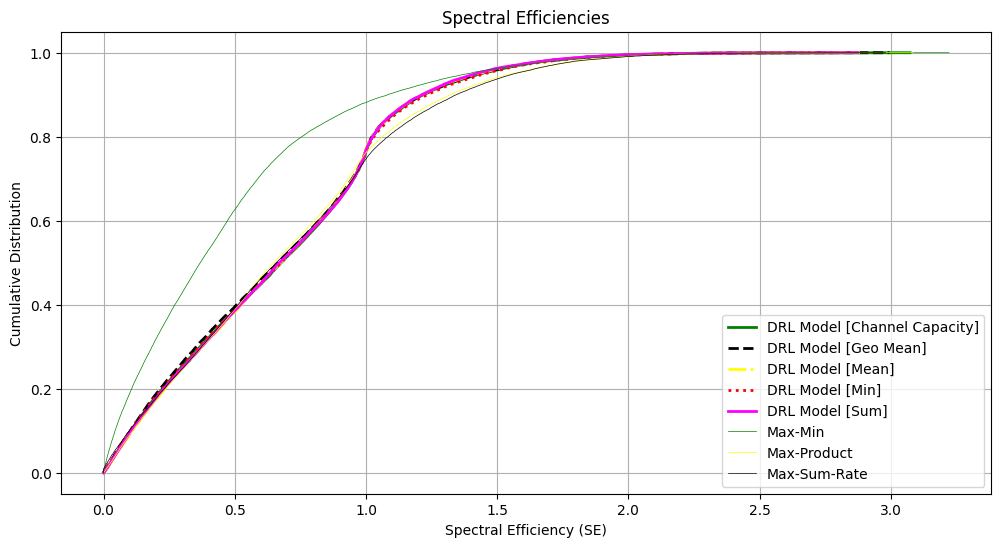

In [49]:
plot_cdf_pdf(data=data, title='Spectral Efficiencies', xlabel='Spectral Efficiency (SE)', operation=None, cumulative=True)

In [23]:
comparison_result = compare_models(data)
print(comparison_result)

                                           Label Average SE    Max SE  \
Model_ch_cap_SEs    DRL Model [Channel Capacity]   0.680671  3.073057   
Model_geo_mean_SEs          DRL Model [Geo Mean]   0.672959  2.994444   
Model_mean_SEs                  DRL Model [Mean]   0.680784  2.882385   
Model_min_SEs                    DRL Model [Min]   0.681605  2.794427   
Model_sum_SEs                    DRL Model [Sum]   0.679328  2.874017   
maxmin_se                                Max-Min   0.476621  3.221512   
maxprod_se                           Max-Product   0.695001  3.085127   
sumrate_se                          Max-Sum-Rate   0.700296   2.97944   

                   Standard Deviation 25th Percentile 50th Percentile  \
Model_ch_cap_SEs             0.443146        0.294542        0.676713   
Model_geo_mean_SEs           0.444404        0.283037        0.665204   
Model_mean_SEs                0.43875        0.300981        0.673731   
Model_min_SEs                0.447723        0.293

In [24]:
compare_cdfs_ks(data)['Best Model']

{'Best Model by KS Statistic': 'DRL Model [Min]',
 'Best Model by P-Value': 'DRL Model [Channel Capacity]',
 'Best Model by Area': 'DRL Model [Min]'}

In [25]:
compare_cdfs_emd(data)['Best Model']

'Rank 1: DRL Model [Min], Rank 2: DRL Model [Channel Capacity], Rank 3: DRL Model [Mean], Rank 4: DRL Model [Sum], Rank 5: DRL Model [Geo Mean], Rank 6: Max-Product, Rank 7: Max-Sum-Rate, Rank 8: Max-Min'

In [26]:
compare_cdfs_moments(data)['Ranked Models']

'Rank 1: sumrate_se, Rank 2: maxprod_se, Rank 3: Model_min_SEs, Rank 4: Model_mean_SEs, Rank 5: Model_ch_cap_SEs, Rank 6: Model_sum_SEs, Rank 7: Model_geo_mean_SEs, Rank 8: maxmin_se'